# Script

In [0]:
!unzip drive*

Archive:  drive-download-20200123T221335Z-001.zip
  inflating: Artigo 16.txt           
  inflating: Artigo 4.txt            
  inflating: Artigo 1.txt            
  inflating: Artigo 9.txt            
  inflating: Artigo 6.txt            
  inflating: Artigo 5.txt            
  inflating: Artigo 3.txt            
  inflating: Artigo 14.txt           
  inflating: Artigo 11.txt           
  inflating: Artigo 2.txt            
  inflating: Artigo 13.txt           
  inflating: Artigo 12.txt           


#Imports

In [0]:
import pandas as pd
import glob
import codecs
import re
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [0]:
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Functions

In [0]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
  # build a list of all description strings
  all_desc = set()
  for key,value in descriptions.items():
    for w in value.split():
      all_desc.update({w})
  return all_desc

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

# Load docs

In [0]:
files = []
for file in glob.glob("*.txt"):
  try:
    print(file)
    tfh = codecs.open(file, "rb", encoding="utf-8")
    files.append(tfh.readlines())
  except:
    print("Erro ao ler tentando outro encoding")
    tfh = codecs.open(file, "rb", encoding="ISO-8859-1")
    files.append(tfh.readlines())

Artigo 11.txt
Artigo 5.txt
Artigo 6.txt
Artigo 2.txt
Artigo 16.txt
Artigo 13.txt
Artigo 12.txt
Artigo 14.txt
Artigo 9.txt
Artigo 4.txt
Artigo 1.txt
Erro ao ler tentando outro encoding
Artigo 3.txt


#Análises

## Cleaning Text

In [0]:
clean_files = []
for doc in files:
  all_doc = ' '.join(doc)
  clean_files.append(re.sub('\s+', ' ', all_doc))

In [0]:
one_doc = ' '.join(clean_files)

In [0]:
tokens = nltk.word_tokenize(one_doc)

In [0]:
stemming = PorterStemmer()
stem = [stemming.stem(word) for word in tokens]

In [0]:
stops = set(stopwords.words("portuguese"))      
stops_eng = set(stopwords.words("english"))    
filtered_words = [word for word in stem if word not in stops]
filtered_words_1 = [word for word in filtered_words if word not in stops_eng]

In [0]:
filtered_words_only =list(filter(lambda x:x, map(lambda x:re.sub(r'[^A-Za-z]', '', x), filtered_words_1)))

In [0]:
filtered_words_only = [i for i in filtered_words_only if len(i) > 1]

## Word cloud

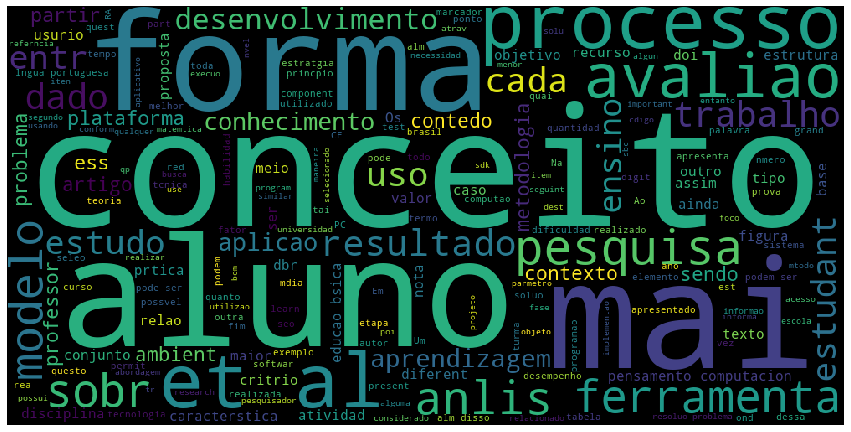

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = filtered_words_only
unique_string=(" ").join(text)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

## Frequency

### Top 10

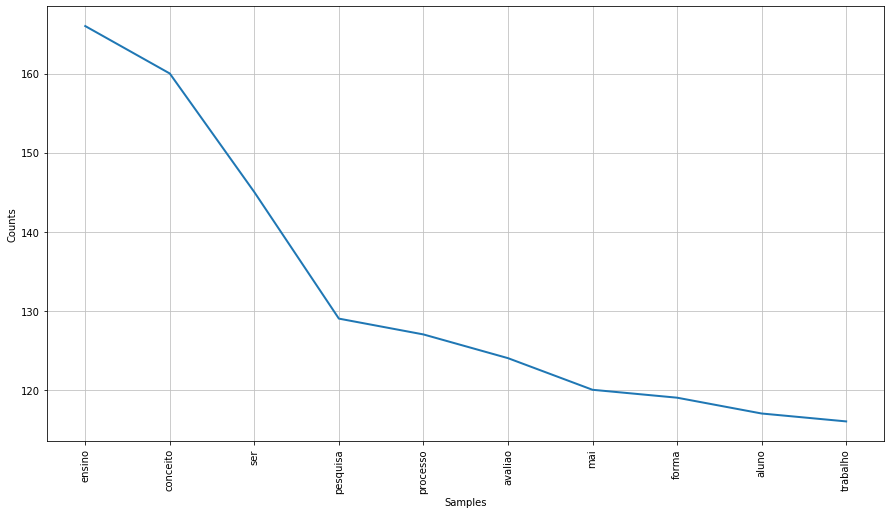

In [0]:
fd = nltk.FreqDist(filtered_words_only)
plt.figure(figsize=(15,8))
fd.plot(10,cumulative=False)

### Top 50

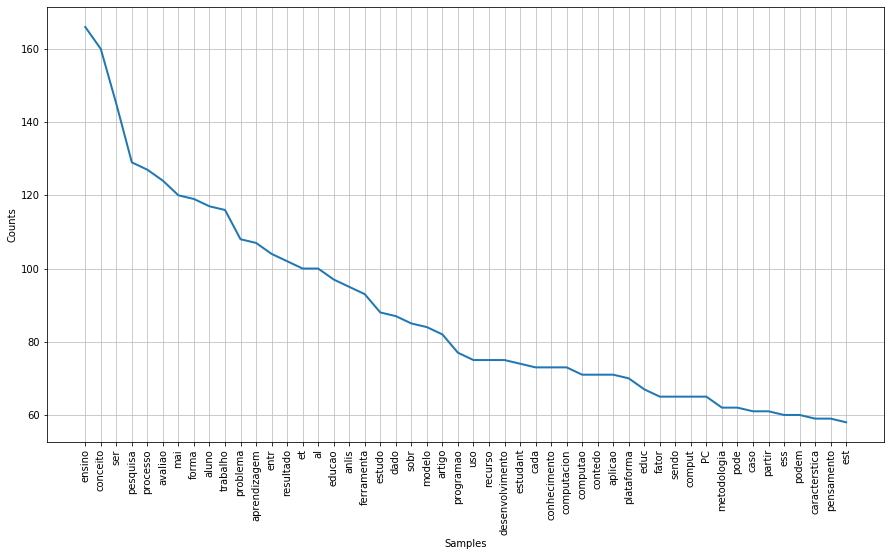

In [0]:
fd = nltk.FreqDist(filtered_words_only)
plt.figure(figsize=(15,8))
fd.plot(50,cumulative=False)

### Top 100

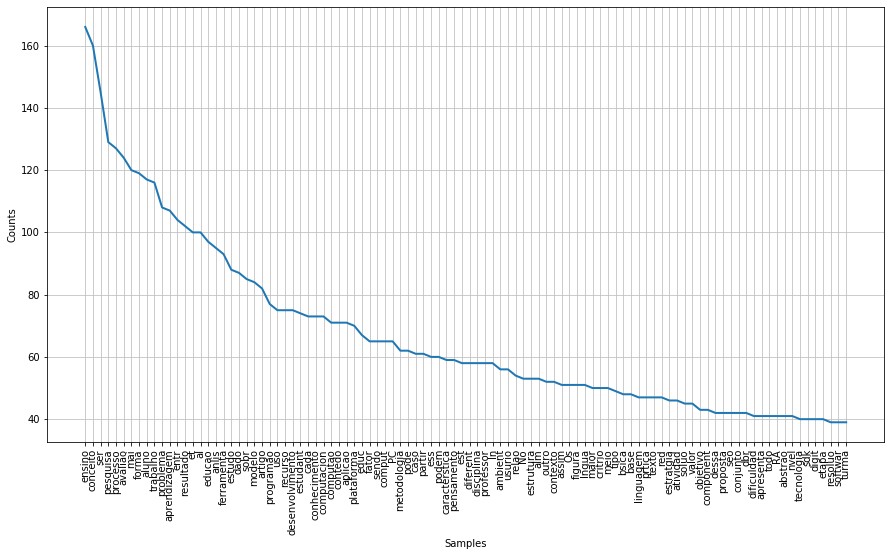

In [0]:
fd = nltk.FreqDist(filtered_words_only)
plt.figure(figsize=(15,8))
fd.plot(100,cumulative=False)

##Sumarization

https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65

In [0]:
def _create_frequency_table(text_string) -> dict:

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [0]:
freq = _create_frequency_table(one_doc)

In [0]:
token = sent_tokenize(one_doc)

In [0]:
def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

In [0]:
sent_val = _score_sentences(token, freq)

In [0]:
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average

In [0]:
threshold = _find_average_score(sent_val)

In [0]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [0]:
summary = _generate_summary(token, sent_val, 1.5 * threshold)

In [0]:
print(summary)

 Resumo. 1. 2018). 2010, Keuning et al. 2018). 2011). 2018). 2005, Pimentel et al. 2005, Alhazbi et al. 2010, Kautzmann & Jaques 2016). 2016, Keuning et al. 2018, Prather et al. 2018, Rodriguez et al. 2018). 2. Prather et al. 2019). 2012). 2011, Chaves et al. 2013). 2018). 3. 4. 5. Computer Science Education, 15(2):83–102. (2008). 21st Century Competencies. In Proc. 50th ACM SIGCSE, 585-591. In Proc. 1st ICER, 81-86. & Ferreira , K. H. A. (2013). ed.). O'Reilly Community Press. Dobre, I. (2015). In Proc ACM SIGCSE, 1240. Flavell, J. H. (1976). ), The nature of intelligence, 231–235. RENOTE, 9 (1). (2013). In Proc. & Fernandes, M. A.. (2018). RBIE, 26 (3), 163-179. (2010). In Proc. 86–93. RBIE, 24(02), 22. (2018). In Proc. Conf. ACM, 1449–1461. In Proc. 23rd ACM ITiCSE , 55-106. Mani M. & Mazumder Q. In Proc. ACM, 53–58. Metcalfe J. MIT Press. (2017). RBIE, 13(1). & Cohen, M. (2018). In Proc. 41-50. In Proc. ACM SIGCSE , 531-537. Anais do SBIE. (2012). Proc. Int. Conf. e-Learning, e-Bus

##N-Gram frequency

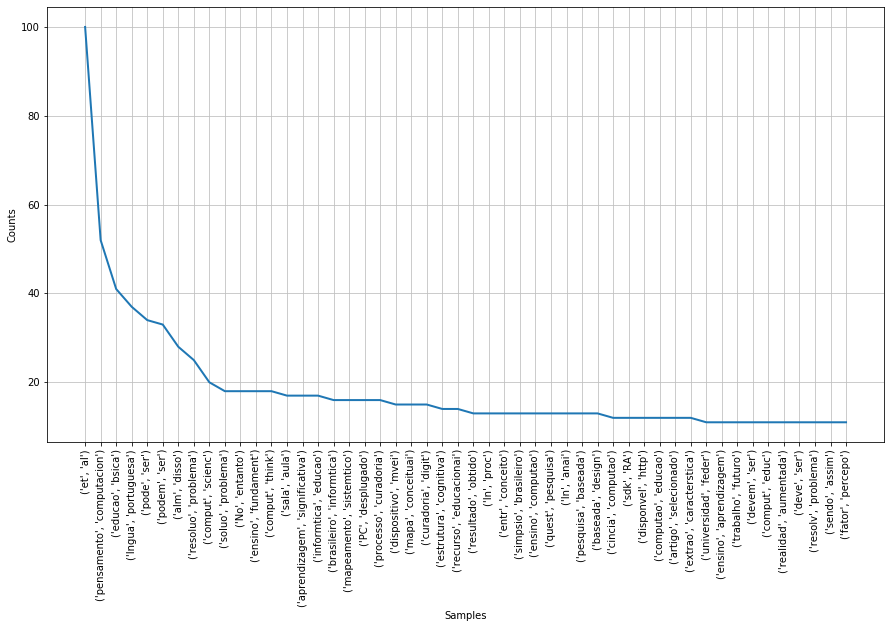

In [0]:
#Create your bigrams
bgs = nltk.bigrams(filtered_words_only)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
plt.figure(figsize=(15,8))
fdist.plot(50,cumulative=False)